In [6]:

import keras.models
from tensorflow import keras
from tensorflow import tf
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
model = keras.models.Sequential()

In [12]:
# Split the data into training and testing
(trainingX, trainingy), (testingX, testingy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainingX.shape)
print('Test: X = ', testingX.shape)

4422102/4422102 [==============================] - 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


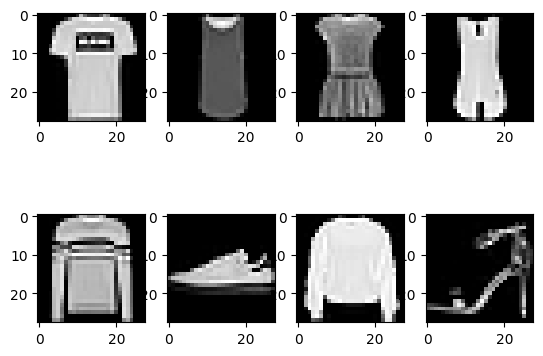

In [13]:
for i in range(1, 9):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(2, 4, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(trainingX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [14]:
trainingX = np.expand_dims(trainingX,-1)
testingX = np.expand_dims(testingX,-1)

print(trainingX.shape)
print(testingX.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
def model_architecture():
  models = Sequential()

  models.add(Conv2D(64,(5,5),padding = "same" , activation = "relu",input_shape=(28, 28,1)))

  models.add(MaxPooling2D(pool_size=(2,2)))
  models.add(Conv2D(128,(5,5),padding = "same",activation = "relu"))

  models.add(MaxPooling2D(pool_size=(2,2)))
  models.add(Conv2D(256,(5,5),padding = "same", activation = "relu"))

  models.add(MaxPooling2D(pool_size = (2,2)))

  models.add(Flatten())
  models.add(Dense(256,activation= "relu"))

  models.add(Dense(10,activation = "softmax"))
  return models


In [10]:
model = model_architecture()
model.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)        

In [ ]:
hist = model.fit(
    trainingX.astype(np.float32) ,trainingy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 507s 5s/step - loss: 3.0747 - sparse_categorical_accuracy: 0.6491 - val_loss: 0.4416 - val_sparse_categorical_accuracy: 0.8378
Epoch 2/10
100/100 [==============================] - 503s 5s/step - loss: 0.3922 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3560 - val_sparse_categorical_accuracy: 0.8700
Epoch 3/10
100/100 [==============================] - 504s 5s/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.3350 - val_sparse_categorical_accuracy: 0.8768
Epoch 4/10
100/100 [==============================] - 504s 5s/step - loss: 0.2833 - sparse_categorical_accuracy: 0.8957 - val_loss: 0.3021 - val_sparse_categorical_accuracy: 0.8900
Epoch 5/10
100/100 [==============================] - 503s 5s/step - loss: 0.2624 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.3152 - val_sparse_categorical_accuracy: 0.8840
Epoch 6/10
100/100 [==============================] - 504s 5s/step - loss: 0.2386 - sparse_cate

In [19]:
model.save_weights('./model.h5', overwrite=True)

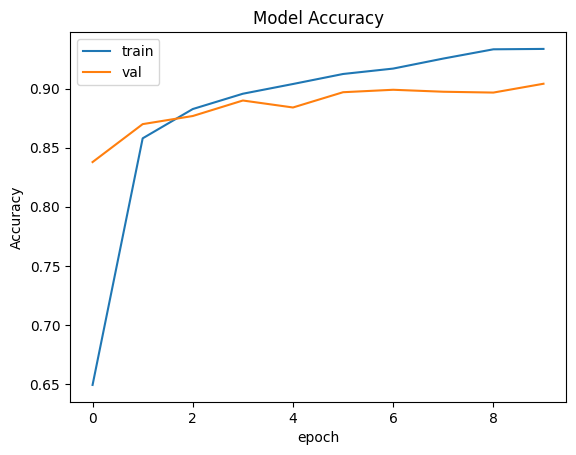

In [ ]:
#Accuracy vs Epoch plot

plt.plot(hist.history['sparse_categorical_accuracy'])
plt.plot(hist.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'] , loc= 'upper left')
plt.show()


1/1 [==============================] - 0s 40ms/step
shirt


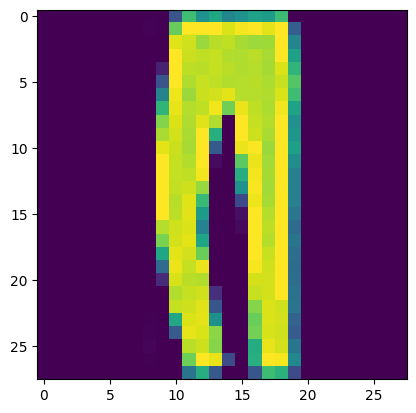

In [17]:
#10 output labels:
labels = ['t_shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boots']

#Predictions:
predictions = model.predict(testingX[2:3])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testingX[2:3][0])
plt.show()
